## Linear regression with multiple variables

**Import third-party libraries and modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from computeCostMulti import computeCostMulti
from featureNormalize import featureNormalize
from gradientDescentMulti import gradientDescentMulti
from normalEqn import normalEqn

In this part, we will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. This column is the size if the house (in square feet), the second column is the number of bedrooms, and third column is the price of the house.

In [2]:
## ================================== Part 1: Feature Normalization ===================================
print('Loading data ...\n')

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')
print(data)

Loading data ...

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.100

Using *numpy slicing* to get training examples and labels

In [3]:
data_ = data.copy()
# Get training examples and labels
X = data[:, :-1].copy()
y = data[:, -1:].copy()

# length of training examples
m = len(y)
# number of features
n = len(X[0, :])

Print out some data points

In [4]:
# Print out some data points
print('First 10 examples from the dataset: \n')
for i in range(10):
    print('[%.0f %.0f], y = %.0f\n' % (X[i, 0], X[i, 1], y[i]))

First 10 examples from the dataset: 

[2104 3], y = 399900

[1600 3], y = 329900

[2400 3], y = 369000

[1416 2], y = 232000

[3000 4], y = 539900

[1985 4], y = 299900

[1534 3], y = 314900

[1427 3], y = 198999

[1380 3], y = 212000

[1494 3], y = 242500



### 1. Feature Normalization
The `ex1_multi.py` script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

The code in **featureNormalize.py** to:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale the feature values by their respective "standard deviations".

**Implementation note**: When normalizing the features, it is important to store the values used for normalization - the *mean* value and the *standard deviation* used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [5]:
# Scale features and set them to zero mean
print('Normalizing Features ...\n')

[X, mu, sigma] = featureNormalize(X)

Normalizing Features ...



In [6]:
# Add intercept
X = np.concatenate((np.ones((m, 1)), X), axis=1)

### 2. Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

The code in **computeCostMulti.py** and **gradientDescentMulti.py** to implement the cost function and gradient descent for linear regression with multi variables.

___

![](fig/NormalEquation.png)

#### Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find learning rate that converges quickly. You can change the learning rate by modifying `ex1_multi.py` and changing the part of the code that sets learning rate.

The next phase in `ex1_multi.py`  will call our *gradientDescent* function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector J. After the last iteration, the `ex1_multi.py` scripts plots the J values against the number of the iterations.

If you picked a learning rate wihin a good range, your plot look similar Figure below. If your graph looks very different, especically if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate on log-scale (), at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to| adjust the number of iterations your are running if that will help you see the overall trend in the curve.

Running gradient descent ...



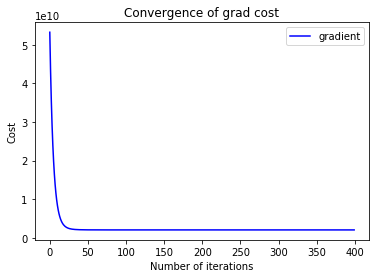

In [7]:
## ================================ Part 2: Gradient Descent ===================================
print('Running gradient descent ...\n')

alpha = 0.1
num_iters = 400

# Init theta and run gradient descent
theta = np.zeros((n + 1, 1))
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
conv_fig = plt.figure()
x = np.arange(len(J_history))
plt.plot(x, J_history, 'b', label='gradient')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence of grad cost')
plt.legend()

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

In [8]:
# Display of gradient decent's result
print('Theta computed from gradient descent: \n')
print('Theta: ')
print(theta)

Theta computed from gradient descent: 

Theta: 
[[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


Using the best learning rate that you found, run the `ex1_multi.py` script to run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don't forget to normalize your features when you make this prediction!

In [9]:
# Estimate the price of a 1650 square feets, 3 bed rooms house

# raw tested data points
X_test = np.array([[1650], [3]])
# Normalizing tested data points
X_test = (X_test - mu) / sigma

# Add intercept
X_test = np.concatenate( (np.array([[1]]), X_test) , axis = 0 )

In [10]:
# predict
price = theta.T.dot(X_test)

print('Predicted price of 1650 sq-ft, 3 br house ')
print('(using gradient descent): %f\n' % (price))

Predicted price of 1650 sq-ft, 3 br house 
(using gradient descent): 293081.464529



### 3. Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is

$$
\theta = (X^{T}X)^{-1}X^{T}\vec{y}^{\,}
$$

Using this formula does not require any feature scaling, and you will get a exact solution in one calculation.

The code in **normalEqn.py** to use the formula above to calculate $\theta$. Remember that while you don't need to scale your features, we still need to add a column add a column of 1's to the X matrix to have an intercept term $(\theta_{0})$. The code in `ex1.py` will add the column of 1's to X for us.

In [11]:
## ======================================= Part 3: Normal Equations ====================================
print('Solving with normal equations ...\n')

# Load data
X = data[:, :-1].copy()
y = data[:, -1]

# Add intercept
X = np.concatenate( (np.ones((m, 1)) , X) , axis=1 )

Solving with normal equations ...



In [12]:
# Calculate the params from the normal equations
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations:\n')
print(theta)
print('\n')

Theta computed from the normal equations:

[89597.9095428    139.21067402 -8738.01911233]




Now, once we have found $\theta$ using this method, use it to make price prediction for a 1650 square feet house with 3 bedrooms. We should find that gives the same predicted price as the value you obtained using the model fit with gradient descent.

In [13]:
# Estimate the price of a 1650 sq-ft, 3 br house
X_test = np.array([[1650], [3]])
X_test = np.vstack((1, X_test))

# predict
price = theta.T.dot(X_test)

print('Predicted price of 1650 sq-ft, 3 br house ')
print('(using Normal Equations): %f\n' % (price))

Predicted price of 1650 sq-ft, 3 br house 
(using Normal Equations): 293081.464335

